In [2]:
!pip install pandas-profiling --upgrade --quiet


ERROR: phik 0.12.0 has requirement scipy>=1.5.2, but you'll have scipy 1.5.0 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\iTTaste\\anaconda3\\Lib\\site-packages\\~arkupsafe\\_speedups.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [3]:
from urllib.request import urlretrieve

In [4]:
italy_covid_url = 'https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'

urlretrieve(italy_covid_url, 'italy-covid-daywise.csv')

('italy-covid-daywise.csv', <http.client.HTTPMessage at 0x1b4645833d0>)

In [5]:
import pandas as pd

In [6]:
covid_df = pd.read_csv('italy-covid-daywise.csv')

In [7]:
len(covid_df)

248

In [8]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [9]:
covid_df.dtypes

date           object
new_cases     float64
new_deaths    float64
new_tests     float64
dtype: object

In [10]:
covid_df.info

<bound method DataFrame.info of            date  new_cases  new_deaths  new_tests
0    2019-12-31        0.0         0.0        NaN
1    2020-01-01        0.0         0.0        NaN
2    2020-01-02        0.0         0.0        NaN
3    2020-01-03        0.0         0.0        NaN
4    2020-01-04        0.0         0.0        NaN
..          ...        ...         ...        ...
243  2020-08-30     1444.0         1.0    53541.0
244  2020-08-31     1365.0         4.0    42583.0
245  2020-09-01      996.0         6.0    54395.0
246  2020-09-02      975.0         8.0        NaN
247  2020-09-03     1326.0         6.0        NaN

[248 rows x 4 columns]>

In [11]:
covid_df.shape

(248, 4)

In [12]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [13]:
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [14]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

In [15]:
# Pandas format is simliar to this
covid_data_dict = {
    'date':       ['2020-08-30', '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03'],
    'new_cases':  [1444, 1365, 996, 975, 1326],
    'new_deaths': [1, 4, 6, 8, 6],
    'new_tests': [53541, 42583, 54395, None, None]
}

In [16]:
covid_df["new_cases"] # column indexing

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

In [17]:
#column position indexing
covid_df["new_cases"][230]

477.0

In [18]:
covid_df.at[230, "new_cases"]

477.0

In [19]:
total_cases = covid_df.new_cases.sum()
print(total_cases)

271515.0


In [20]:
# querying and rows sortations
high_new_cases = covid_df.new_cases>1000

In [21]:
len(high_new_cases)

248

In [22]:
high_new_cases

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

In [23]:
high_new_cases.sum()

72

In [24]:
#to display all of datasets
from IPython.display import display
with pd.option_context('display.max_rows', 100):
    display(covid_df[covid_df.new_cases > 1000])

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
74,2020-03-14,2547.0,252.0,NaN
75,2020-03-15,3497.0,173.0,NaN
76,2020-03-16,2823.0,370.0,NaN
77,2020-03-17,4000.0,347.0,NaN
78,2020-03-18,3526.0,347.0,NaN


In [25]:
covid_df.positive_rate = covid_df.new_cases / covid_df.new_tests

<ipython-input-25-dfc27c83c1cc>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  covid_df.positive_rate = covid_df.new_cases / covid_df.new_tests


In [26]:
covid_df['positive_rate'] = covid_df.new_cases / covid_df.new_tests
covid_df.shape

(248, 5)

In [27]:
covid_df.drop(columns=['positive_rate'], inplace=True)

In [28]:
covid_df.shape

(248, 4)

In [30]:
#sorting values
covid_df.sort_values('new_cases', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
83,2020-03-23,5560.0,649.0,NaN
80,2020-03-20,5322.0,429.0,NaN
85,2020-03-25,5249.0,743.0,NaN
90,2020-03-30,5217.0,758.0,NaN
86,2020-03-26,5210.0,685.0,NaN


In [31]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

In [35]:
covid_df.month==5
# Query the rows for May
covid_df_may = covid_df[covid_df.month == 5]

# Extract the subset of columns to be aggregated
covid_df_may_metrics = covid_df_may[['new_cases', 'new_deaths', 'new_tests']]

# Get the column-wise sum
covid_may_totals = covid_df_may_metrics.sum()
covid_df_may_metrics
covid_df_may

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
122,2020-05-01,1872.0,285.0,43732.0,2020,5,1,4
123,2020-05-02,1965.0,269.0,31231.0,2020,5,2,5
124,2020-05-03,1900.0,474.0,27047.0,2020,5,3,6
125,2020-05-04,1389.0,174.0,22999.0,2020,5,4,0
126,2020-05-05,1221.0,195.0,32211.0,2020,5,5,1
127,2020-05-06,1075.0,236.0,37771.0,2020,5,6,2
128,2020-05-07,1444.0,369.0,13665.0,2020,5,7,3
129,2020-05-08,1401.0,274.0,45428.0,2020,5,8,4
130,2020-05-09,1327.0,243.0,36091.0,2020,5,9,5
131,2020-05-10,1083.0,194.0,31384.0,2020,5,10,6


In [36]:
covid_month_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].sum()

In [38]:
covid_df.groupby("year")[["new_cases", "new_deaths"]].sum()

,new_cases,new_deaths
year,,
2019,0.0,0.0
2020,271515.0,35497.0


In [43]:
covid_month_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].sum()

In [44]:
covid_month_df

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,7772.0,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


In [45]:
covid_month_mean_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].mean()
covid_month_mean_df

,new_cases,new_deaths,new_tests
month,,,
1,0.096774,0.000000,NaN
2,30.517241,0.724138,NaN
3,3253.258065,373.225806,NaN
4,3395.066667,536.366667,38144.636364
5,937.838710,182.516129,34797.419355
6,259.066667,46.800000,27678.466667
7,216.838710,12.516129,25732.000000
8,679.354839,11.129032,35442.064516
9,1099.000000,6.666667,54395.000000


In [46]:
covid_df['total_cases'] = covid_df.new_cases.cumsum()

In [47]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0
...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,266853.0
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268218.0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269214.0
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270189.0


    VISUALIZATION
    

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:
yield_apples = [0.895, 0.91, 0.919, 0.926, 0.929, 0.931]

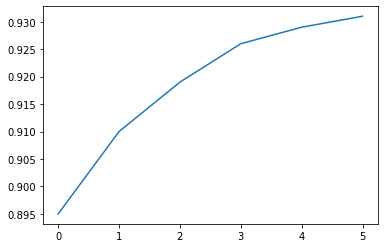

In [50]:
plt.plot(yield_apples)

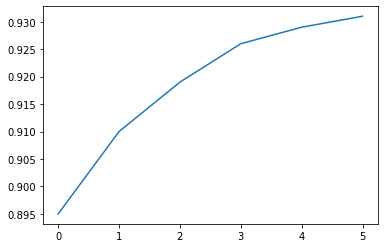

In [51]:
plt.plot(yield_apples);

In [52]:
years = [2010, 2011, 2012, 2013, 2014, 2015]
yield_apples = [0.895, 0.91, 0.919, 0.926, 0.929, 0.931]

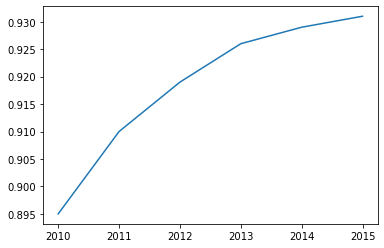

In [53]:
plt.plot(years, yield_apples);

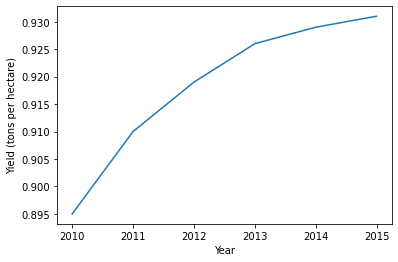

In [54]:
plt.plot(years, yield_apples)
plt.xlabel('Year')
plt.ylabel('Yield (tons per hectare)');

In [55]:
years = range(2000, 2012)
apples = [0.895, 0.91, 0.919, 0.926, 0.929, 0.931, 0.934, 0.936, 0.937, 0.9375, 0.9372, 0.939]
oranges = [0.962, 0.941, 0.930, 0.923, 0.918, 0.908, 0.907, 0.904, 0.901, 0.898, 0.9, 0.896, ]

In [56]:
#multiple line plots

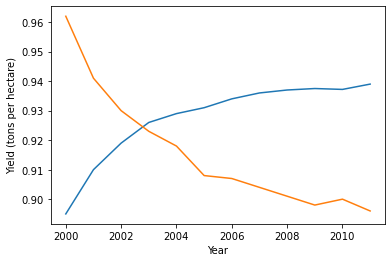

In [57]:
plt.plot(years, apples)
plt.plot(years, oranges)
plt.xlabel('Year')
plt.ylabel('Yield (tons per hectare)');

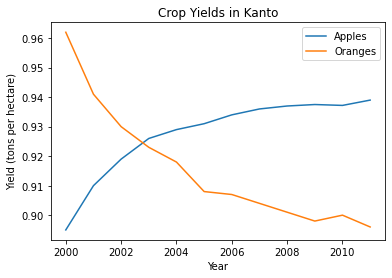

In [58]:
#inclusion of  tittle and legend
plt.plot(years, apples)
plt.plot(years, oranges)

plt.xlabel('Year')
plt.ylabel('Yield (tons per hectare)')

plt.title("Crop Yields in Kanto")
plt.legend(['Apples', 'Oranges']);

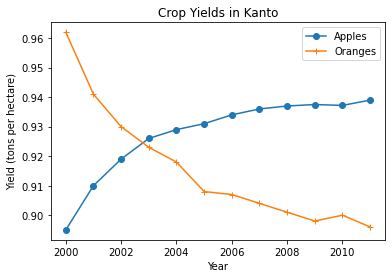

In [62]:
#line marker with addion of maker stated in plot comand ( o,*,+,x )
plt.plot(years, apples, marker='o')
plt.plot(years, oranges, marker='+')

plt.xlabel('Year')
plt.ylabel('Yield (tons per hectare)')

plt.title("Crop Yields in Kanto")
plt.legend(['Apples', 'Oranges']);

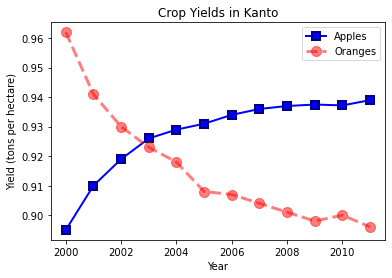

In [63]:
plt.plot(years, apples, marker='s', c='b', ls='-', lw=2, ms=8, mew=2, mec='navy')
plt.plot(years, oranges, marker='o', c='r', ls='--', lw=3, ms=10, alpha=.5)

plt.xlabel('Year')
plt.ylabel('Yield (tons per hectare)')

plt.title("Crop Yields in Kanto")
plt.legend(['Apples', 'Oranges']);

The `fmt` argument provides a shorthand for specifying the marker shape, line style, and line color. It can be provided as the third argument to `plt.plot`.

```
fmt = '[marker][line][color]'
```


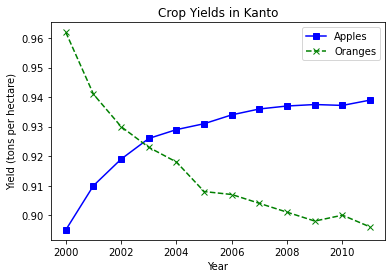

In [67]:
plt.plot(years, apples, 's-b')
plt.plot(years, oranges, 'x--g')

plt.xlabel('Year')
plt.ylabel('Yield (tons per hectare)')

plt.title("Crop Yields in Kanto")
plt.legend(['Apples', 'Oranges']);

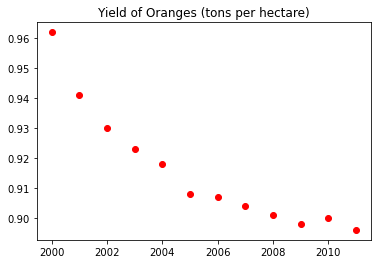

In [69]:
#when line are not specified only narkers are drawn
plt.plot(years, oranges, 'or')
plt.title("Yield of Oranges (tons per hectare)");

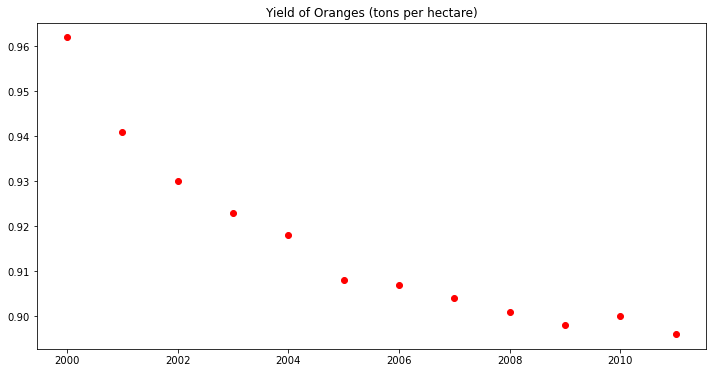

In [72]:
plt.figure(figsize=(12, 6))

plt.plot(years, oranges, 'or')
plt.title("Yield of Oranges (tons per hectare)");

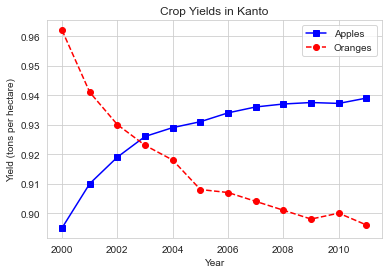

In [74]:
#using sns for  background
sns.set_style("whitegrid")
plt.plot(years, apples, 's-b')
plt.plot(years, oranges, 'o--r')

plt.xlabel('Year')
plt.ylabel('Yield (tons per hectare)')

plt.title("Crop Yields in Kanto")
plt.legend(['Apples', 'Oranges']);

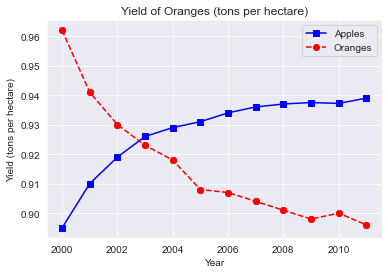

In [78]:
sns.set_style("darkgrid")
plt.plot(years, apples, 's-b')
plt.plot(years, oranges, 'o--r')

plt.xlabel('Year')
plt.ylabel('Yield (tons per hectare)')

plt.title("Crop Yields in Kanto")
plt.legend(['Apples', 'Oranges']);



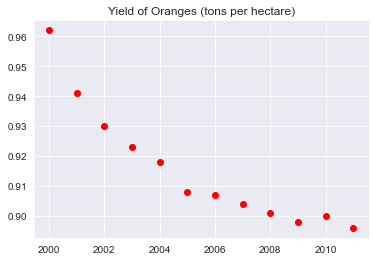

In [79]:
plt.plot(years, oranges, 'or')
plt.title("Yield of Oranges (tons per hectare)");


In [80]:
import matplotlib

In [81]:
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [84]:
#load iris data sets
# Load data into a Pandas dataframe
flowers_df = sns.load_dataset("iris")
flowers_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [85]:
flowers_df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

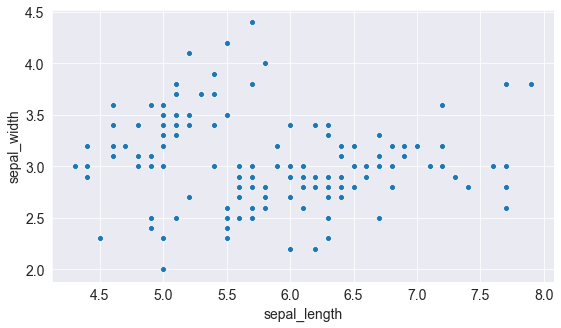

In [88]:
sns.scatterplot(x=flowers_df.sepal_length, y=flowers_df.sepal_width);

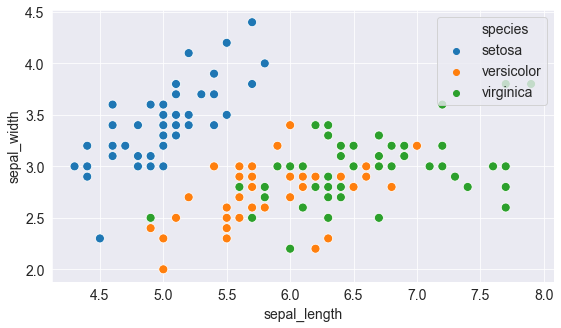

In [93]:
sns.scatterplot(x=flowers_df.sepal_length, y=flowers_df.sepal_width, hue=flowers_df.species, s= 80);

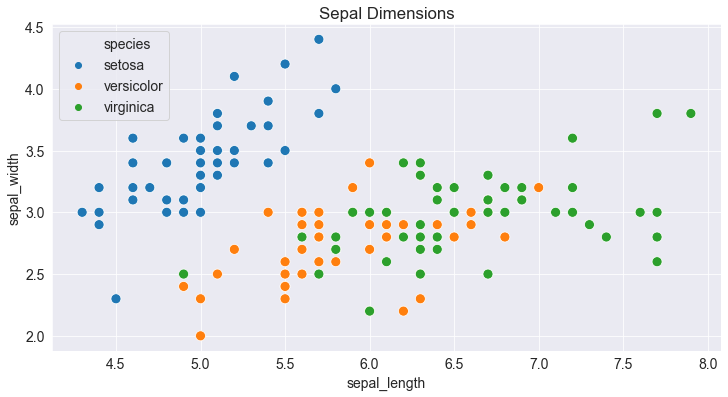

In [104]:
plt.figure(figsize=(12,6))
plt.title('Sepal Dimensions')

sns.scatterplot(x=flowers_df.sepal_length, 
                y=flowers_df.sepal_width, 
                hue=flowers_df.species,
                s=100);

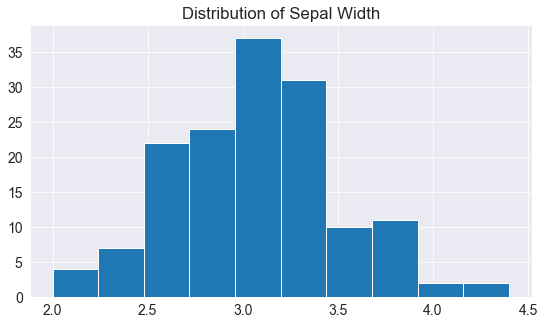

In [106]:
plt.title("Distribution of Sepal Width")
plt.hist(flowers_df.sepal_width);

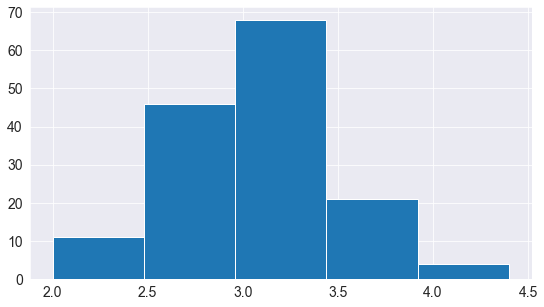

In [108]:
# Specifying the number of bins
plt.hist(flowers_df.sepal_width, bins=5);

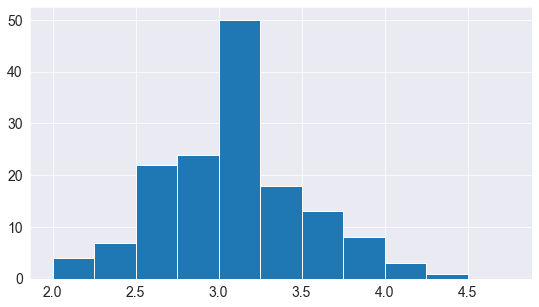

In [116]:
import numpy as np

# Specifying the boundaries of each bin
plt.hist(flowers_df.sepal_width, bins=np.arange(2, 5, 0.25));

In [117]:
setosa_df = flowers_df[flowers_df.species == 'setosa']
versicolor_df = flowers_df[flowers_df.species == 'versicolor']
virginica_df = flowers_df[flowers_df.species == 'virginica']

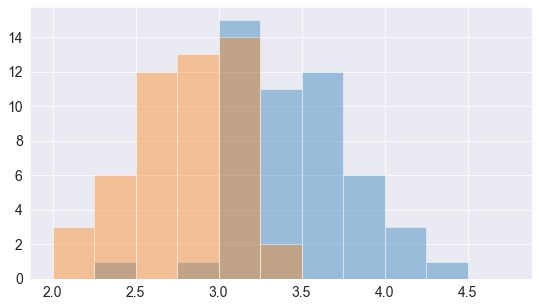

In [121]:
plt.hist(setosa_df.sepal_width, alpha=0.4, bins=np.arange(2, 5, 0.25));
plt.hist(versicolor_df.sepal_width, alpha=0.4, bins=np.arange(2, 5, 0.25));

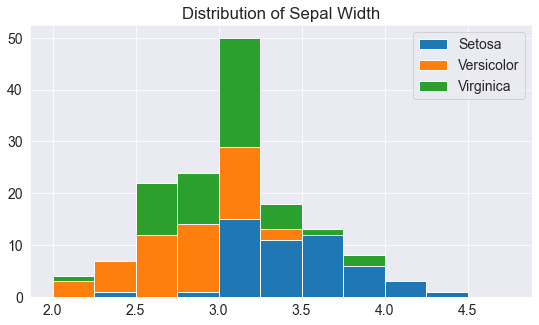

In [124]:
plt.title('Distribution of Sepal Width')

plt.hist([setosa_df.sepal_width, versicolor_df.sepal_width, virginica_df.sepal_width], 
         bins=np.arange(2, 5, 0.25), 
         stacked=True);

plt.legend(['Setosa', 'Versicolor', 'Virginica']);


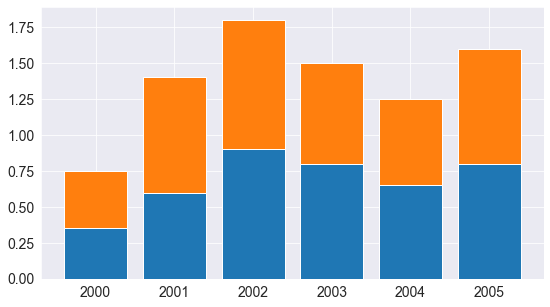

In [130]:
years = range(2000, 2006)
apples = [0.35, 0.6, 0.9, 0.8, 0.65, 0.8]
oranges = [0.4, 0.8, 0.9, 0.7, 0.6, 0.8]
plt.bar(years, apples)
plt.bar(years, oranges, bottom=apples);

In [129]:
tips_df = sns.load_dataset("tips");
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


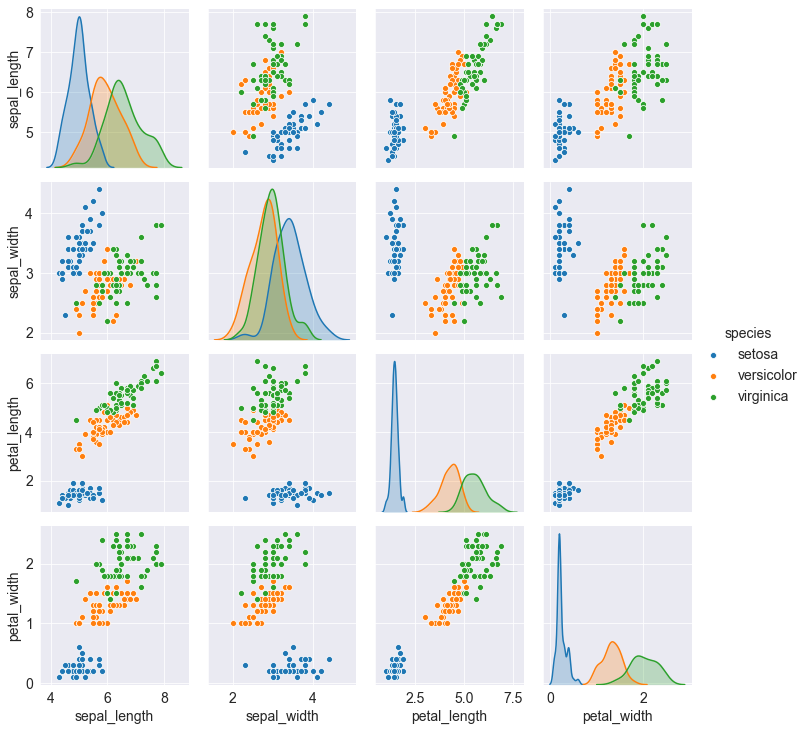

In [133]:
sns.pairplot(flowers_df, hue="species");